In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mset
import tde
from sklearn import svm

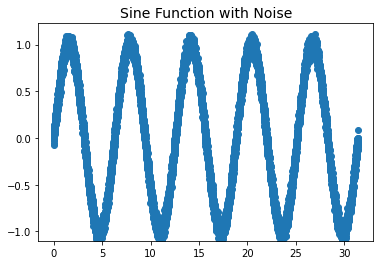

In [31]:
n = 10000 # making 10000 iterations 
t = np.linspace(0, 10*np.pi, n) #function to generate a general sequence out of the range of numbers provided 
x = np.sin(t) + 0.05*np.random.randn(n) #sine funtion with noise added 
fig =(20,3)
plt.scatter(t,x)
#plt.grid()
plt.ylim(-1.1)
plt.title("Sine Function with Noise", fontsize=14)

#SAVING EACH PLOT
filename2 = "Images/sinxfunc.png" # saving the file as the name of the mouse
plt.savefig(filename2, bbox_inches='tight')


In [32]:
X = tde.tde(x) #synthetic dataset 

In [33]:
X=X.T #transposing the data
X

array([[ 0.75030597,  0.8318073 ,  0.03629463],
       [ 0.79177571,  0.86739077, -0.074051  ],
       [ 0.87704034,  0.87511277, -0.02010691],
       ...,
       [-0.02375956, -0.86753081, -0.75824074],
       [ 0.0832415 , -0.89471352, -0.78173137],
       [-0.01164277, -0.85783046, -0.798622  ]])

## All Data

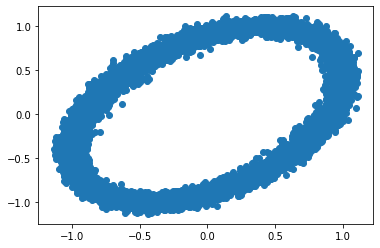

In [34]:
plt.scatter(X[:,0],X[:,1]) #plotting all rows in the "first" and "second" column
#SAVING EACH PLOT
filename = "Images/sinx.png" # saving the file as the name of the mouse
plt.savefig(filename, bbox_inches='tight')

In [9]:
model= svm.OneClassSVM(degree=2)
#creating a 40% fit (training) dataset
cutoff = int(0.4*(X.shape[0])) #changing it into an integer 

In [10]:
#fit(train) the data
model.fit(X[:cutoff,:])
          
#predict the data 
outliers = model.predict(X[cutoff:,:])
outliers_train = model.predict(X[:cutoff,:])
outliers

array([-1, -1, -1, ...,  1,  1,  1])

In [11]:
sum(outliers_train==1)/len(outliers_train)
#sum(outliers==1)/len(outliers)

0.5045797413793104

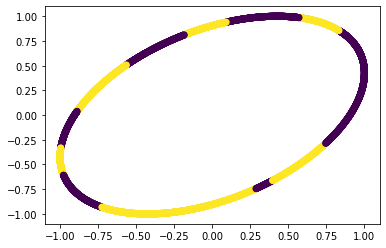

In [23]:
#plotting the scatterplot
plt.scatter(X[cutoff:,0],X[cutoff:,1], c=outliers)

#SAVING EACH PLOT
filename1 = "Images/sinx_Anom_Non.png" # saving the file as the name of the mouse
plt.savefig(filename1, bbox_inches='tight')

## Non-Anomalies

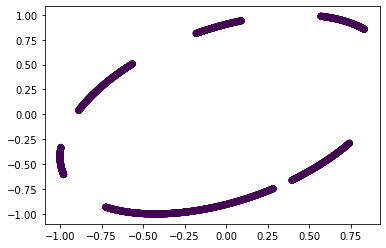

In [10]:
mask = outliers == 1 # filter to "+1" data only. 
#mask = outliers >=-1 # filter to "+1" data only.

Xmask = X[cutoff:][mask]

#plt.scatter(X[:cutoff,0], X[:cutoff,1]) #the blue 
plot1= plt.scatter(Xmask[:, 0], Xmask[:, 1], c=outliers[mask]) #the mask

## Anomalies

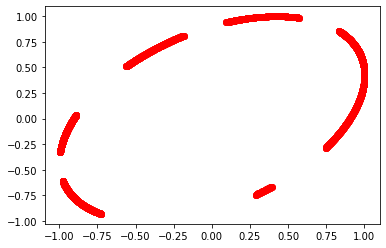

In [11]:
#considered anomalies
mask2 = outliers ==-1 # filter to "-1" data only. 
Xmask2 = X[cutoff:][mask2]
#plot2 = plt.scatter(Xmask2[:, 0], Xmask2[:, 1], c=outliers[mask2])
plot3 = plt.scatter(Xmask2[:, 0], Xmask2[:, 1], color="red") #want to change the color

## Both (anomaly and non-anomaly)

##### Here, both the anomaly (red) and non-anomaly (purple) are displayed. Since their difference is not clear, I potted them both where in the first plot the anomalies are plotted on top of the non-anomalies and in the second plot the opposite is done. This is to show that not all anomaly points are plotted on the outter part of the slanted oval but that also some lie within the inner part. 

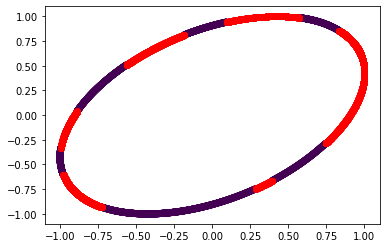

In [12]:
#anomolies --> red
plot1= plt.scatter(Xmask[:, 0], Xmask[:, 1], c=outliers[mask]) #purple
plot3 = plt.scatter(Xmask2[:, 0], Xmask2[:, 1], color="red") #red

##### Comparing it to the purple and yellow plot, we can see that there is a distinction between the red and the puple points since a concerned arrised after the first plot about noting if anomalies within the outter ring if there were anomalies lying under the non-anomaly points as well.

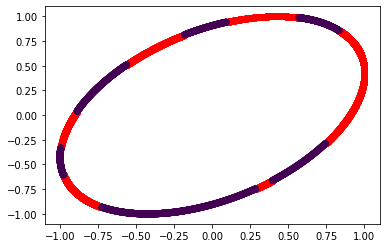

In [13]:
plot3 = plt.scatter(Xmask2[:, 0], Xmask2[:, 1], color="red") #red 
plot1= plt.scatter(Xmask[:, 0], Xmask[:, 1], c=outliers[mask]) #purple

##### The decision_function method is also defined from the scoring function, in such a way that negative values are outliers and non-negative ones are inliers:

In [14]:
model.score_samples(X[:cutoff,:])

array([572.71530848, 572.71531279, 572.71531697, ..., 572.71493704,
       572.71494188, 572.71494669])

In [15]:
decision = model.decision_function(X[:cutoff,:])
len(decision)

3712

In [16]:
decision

array([ 0.00021021,  0.00021453,  0.0002187 , ..., -0.00016122,
       -0.00015638, -0.00015157])

In [17]:
decision_neg = decision<=0
sum(decision_neg)

1839

In [18]:
sum(decision_neg)/len(decision)

0.49542025862068967